<a href="https://colab.research.google.com/github/jabarcmun/INTELIGENCIA-ARTIFICIAL-/blob/main/INTELIGENCIA%20ARTIFICIAL%20/Tarea%204%3A%20Multicapa/Copia_de_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                      # Librería para trabajar con matrices

In [ ]:
# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])  # Entradas: las 4 combinaciones posibles de 2 bits
y = np.array([[0],[1],[1],[0]])          # Salidas deseadas: resultado del XOR para cada par

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
modelo = Sequential([                    # Red neuronal
    Dense(4, activation='relu', input_dim=2),  # Capa oculta: 4 neuronas ReLU
    Dense(1, activation='sigmoid')             # Capa final: 1 neurona con sigmoide (salida 0-1)
])

In [ ]:
from tensorflow.keras.optimizers import Adam # Optimizador Adam que ajusta pesos

In [ ]:
# Tasa de aprendizaje deseada
learning_rate = 0.01                     # Tasa de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
modelo.compile(                            # Entrenamiento
    optimizer=adam_optimizer,              # Optimizador Adam
    loss='binary_crossentropy',            # Se parametriza error
    metrics=['accuracy']                   # Precisión
)

In [ ]:
history = modelo.fit(
    X, y,
    epochs=200,        # Nuḿero de epocas o ciclos
    batch_size=4,      # Pasos del dataset
    verbose=0
)

In [ ]:
history = modelo.fit(           # Entrenamos el modelo
    X, y,                       # Datos XOR
    epochs=500,                 # Limite de épocas.
    batch_size=4,               # Se ejecuta dataset con 4 muestras
    verbose=0,
    callbacks=[                 # lista de entrenamiento
        EarlyStopping(
            monitor='loss',     # Muestra error de perdida
            patience=10,        # Corre 10 epocas
            restore_best_weights=True  # Disminuye el error
        )
    ]
)

In [ ]:
import matplotlib.pyplot as plt            # Librería para graficar

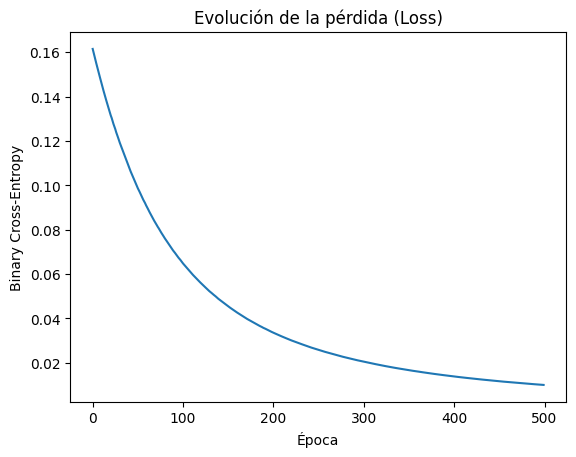

In [ ]:
plt.plot(history.history['loss'])  #Grafica disminucion de error en entrenamiento
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [ ]:
loss, accuracy = modelo.evaluate(X, y)     # Se calculamos: error y precisión final
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0100
Loss: 0.010040816850960255, Accuracy: 1.0


In [ ]:
pred = (modelo.predict(X) > 0.5).astype(int)  # Predice y redondea a 0 o 1
for i, (inp, p) in enumerate(zip(X, pred)):   # Muestra entradas y su predicción
    print(f"{inp} -> {p[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
